In [ ]:
!pip show pandas

In [ ]:
!pip show matplotlib

In [3]:
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [6]:
from scipy import stats

In [ ]:
!pip install numpy

In [ ]:
!pip show numpy

In [4]:
import numpy as np


In [ ]:
import pandas as pd
df = pd.read_csv('/content/911 (1).csv')
df.head(10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68111 entries, 0 to 68110
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        68111 non-null  float64
 1   lng        68111 non-null  float64
 2   desc       68111 non-null  object 
 3   zip        59355 non-null  float64
 4   title      68110 non-null  object 
 5   timeStamp  68110 non-null  object 
 6   twp        68082 non-null  object 
 7   addr       67733 non-null  object 
 8   e          68110 non-null  float64
dtypes: float64(4), object(5)
memory usage: 4.7+ MB


In [13]:
df.describe()

,lat,lng,zip,e
count,68111.000000,68111.000000,59355.000000,68110.0
mean,40.160246,-75.318489,19238.599309,1.0
std,0.098320,0.181377,373.445607,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100961,-75.394536,19038.000000,1.0
50%,40.145840,-75.305876,19401.000000,1.0
75%,40.229715,-75.212915,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [11]:
df.shape

(68111, 9)

#Data Cleaning


In [14]:
#data cleaning
df.duplicated().sum()
#df.drop_duplicates(inplace=True)

0

In [ ]:
df.isna().sum()
#df.isnull().sum()

In [ ]:
#df_fill = df.fillna(0)
#print(df_fill)

In [16]:
df['zip'].median()

19401.0

In [ ]:
#filling a specific column
df['zip'] = df['zip'].fillna(df['zip'].median())
print(df)



In [ ]:

df['twp'] = df['twp'].fillna(0)
print(df)

In [ ]:
df['addr'] = df['addr'].replace({None:0})
print(df)

In [ ]:
df['timeStamp'] = df['timeStamp'].replace({None:0})
df['timeStamp']

In [26]:
df['title'].mode()

,title
0,Traffic: VEHICLE ACCIDENT -


In [ ]:
df['title'] = df['title'].fillna(0)
df['title']

In [ ]:
df['e']=df['e'].fillna(0)
df['e']

In [22]:
df.isna().sum()

,0
lat,0
lng,0
desc,0
zip,0
title,0
timeStamp,0
twp,0
addr,0
e,0


In [ ]:
df.head(10)

In [ ]:
df['twp'].value_counts()

In [ ]:
df['addr'].unique()

In [ ]:
df['title'].value_counts()


In [ ]:
df['title'].unique()

In [ ]:
#to drop some values
#df = df[df['title']!='Fire: SYNCOPAL EPISODE']
#df['title'].unique()


In [24]:
df.to_csv('/content/silver_911.csv',index=False)

In [95]:
df[['Reason','kind']] =df['title'].str.split(':' ,expand =True)
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,kind,Day,Hour,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,17:40:00,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,17:40:00,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,17:40:00,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,17:40:01,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,17:40:01,3


In [87]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic', nan], dtype=object)

In [26]:
df['Reason'].value_counts()

,count
Reason,
EMS,48877
Traffic,35695
Fire,14920


<ipython-input-27-5f6122e4eca4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df['Reason'],palette='rocket')


<Axes: ylabel='Reason'>

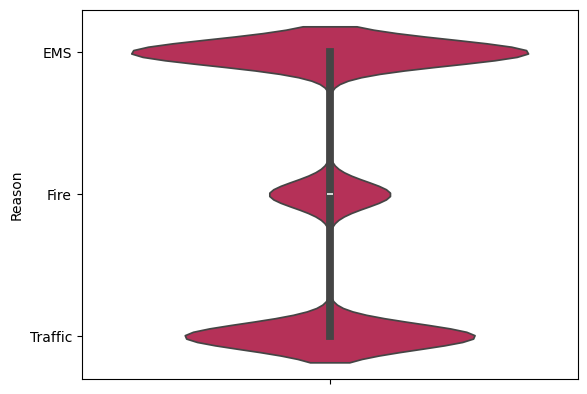

In [27]:
#Draw a bar-plot between Reason & count
sns.violinplot(df['Reason'],palette='rocket')


In [ ]:
df['twp'].unique()

In [ ]:
df['twp'].nunique()

69

In [ ]:
df[['Day','Hour']]=df['timeStamp'].str.split(' ',expand=True)
df.head()

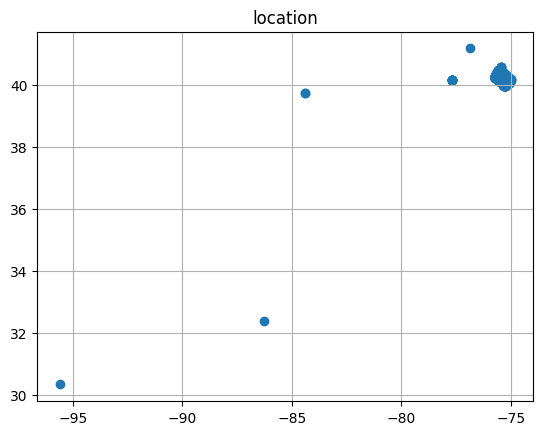

In [60]:
plt.scatter(x=df['lng'] ,y=df['lat'])
plt.title('location')
plt.grid(True)
plt.show()

<ipython-input-85-c4e7a754596f>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['zip'],palette='rocket')


<Axes: xlabel='zip', ylabel='Density'>

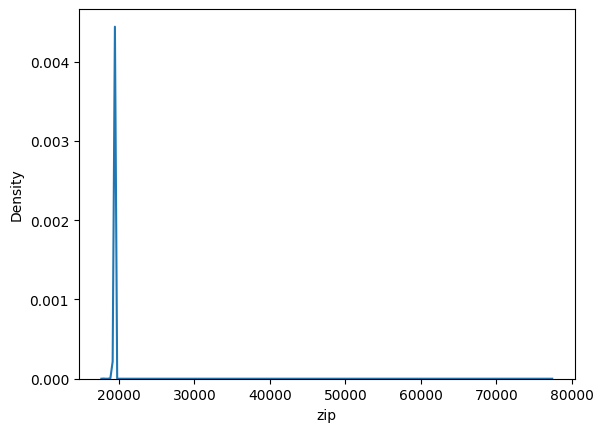

In [85]:
sns.kdeplot(df['zip'],palette='rocket')


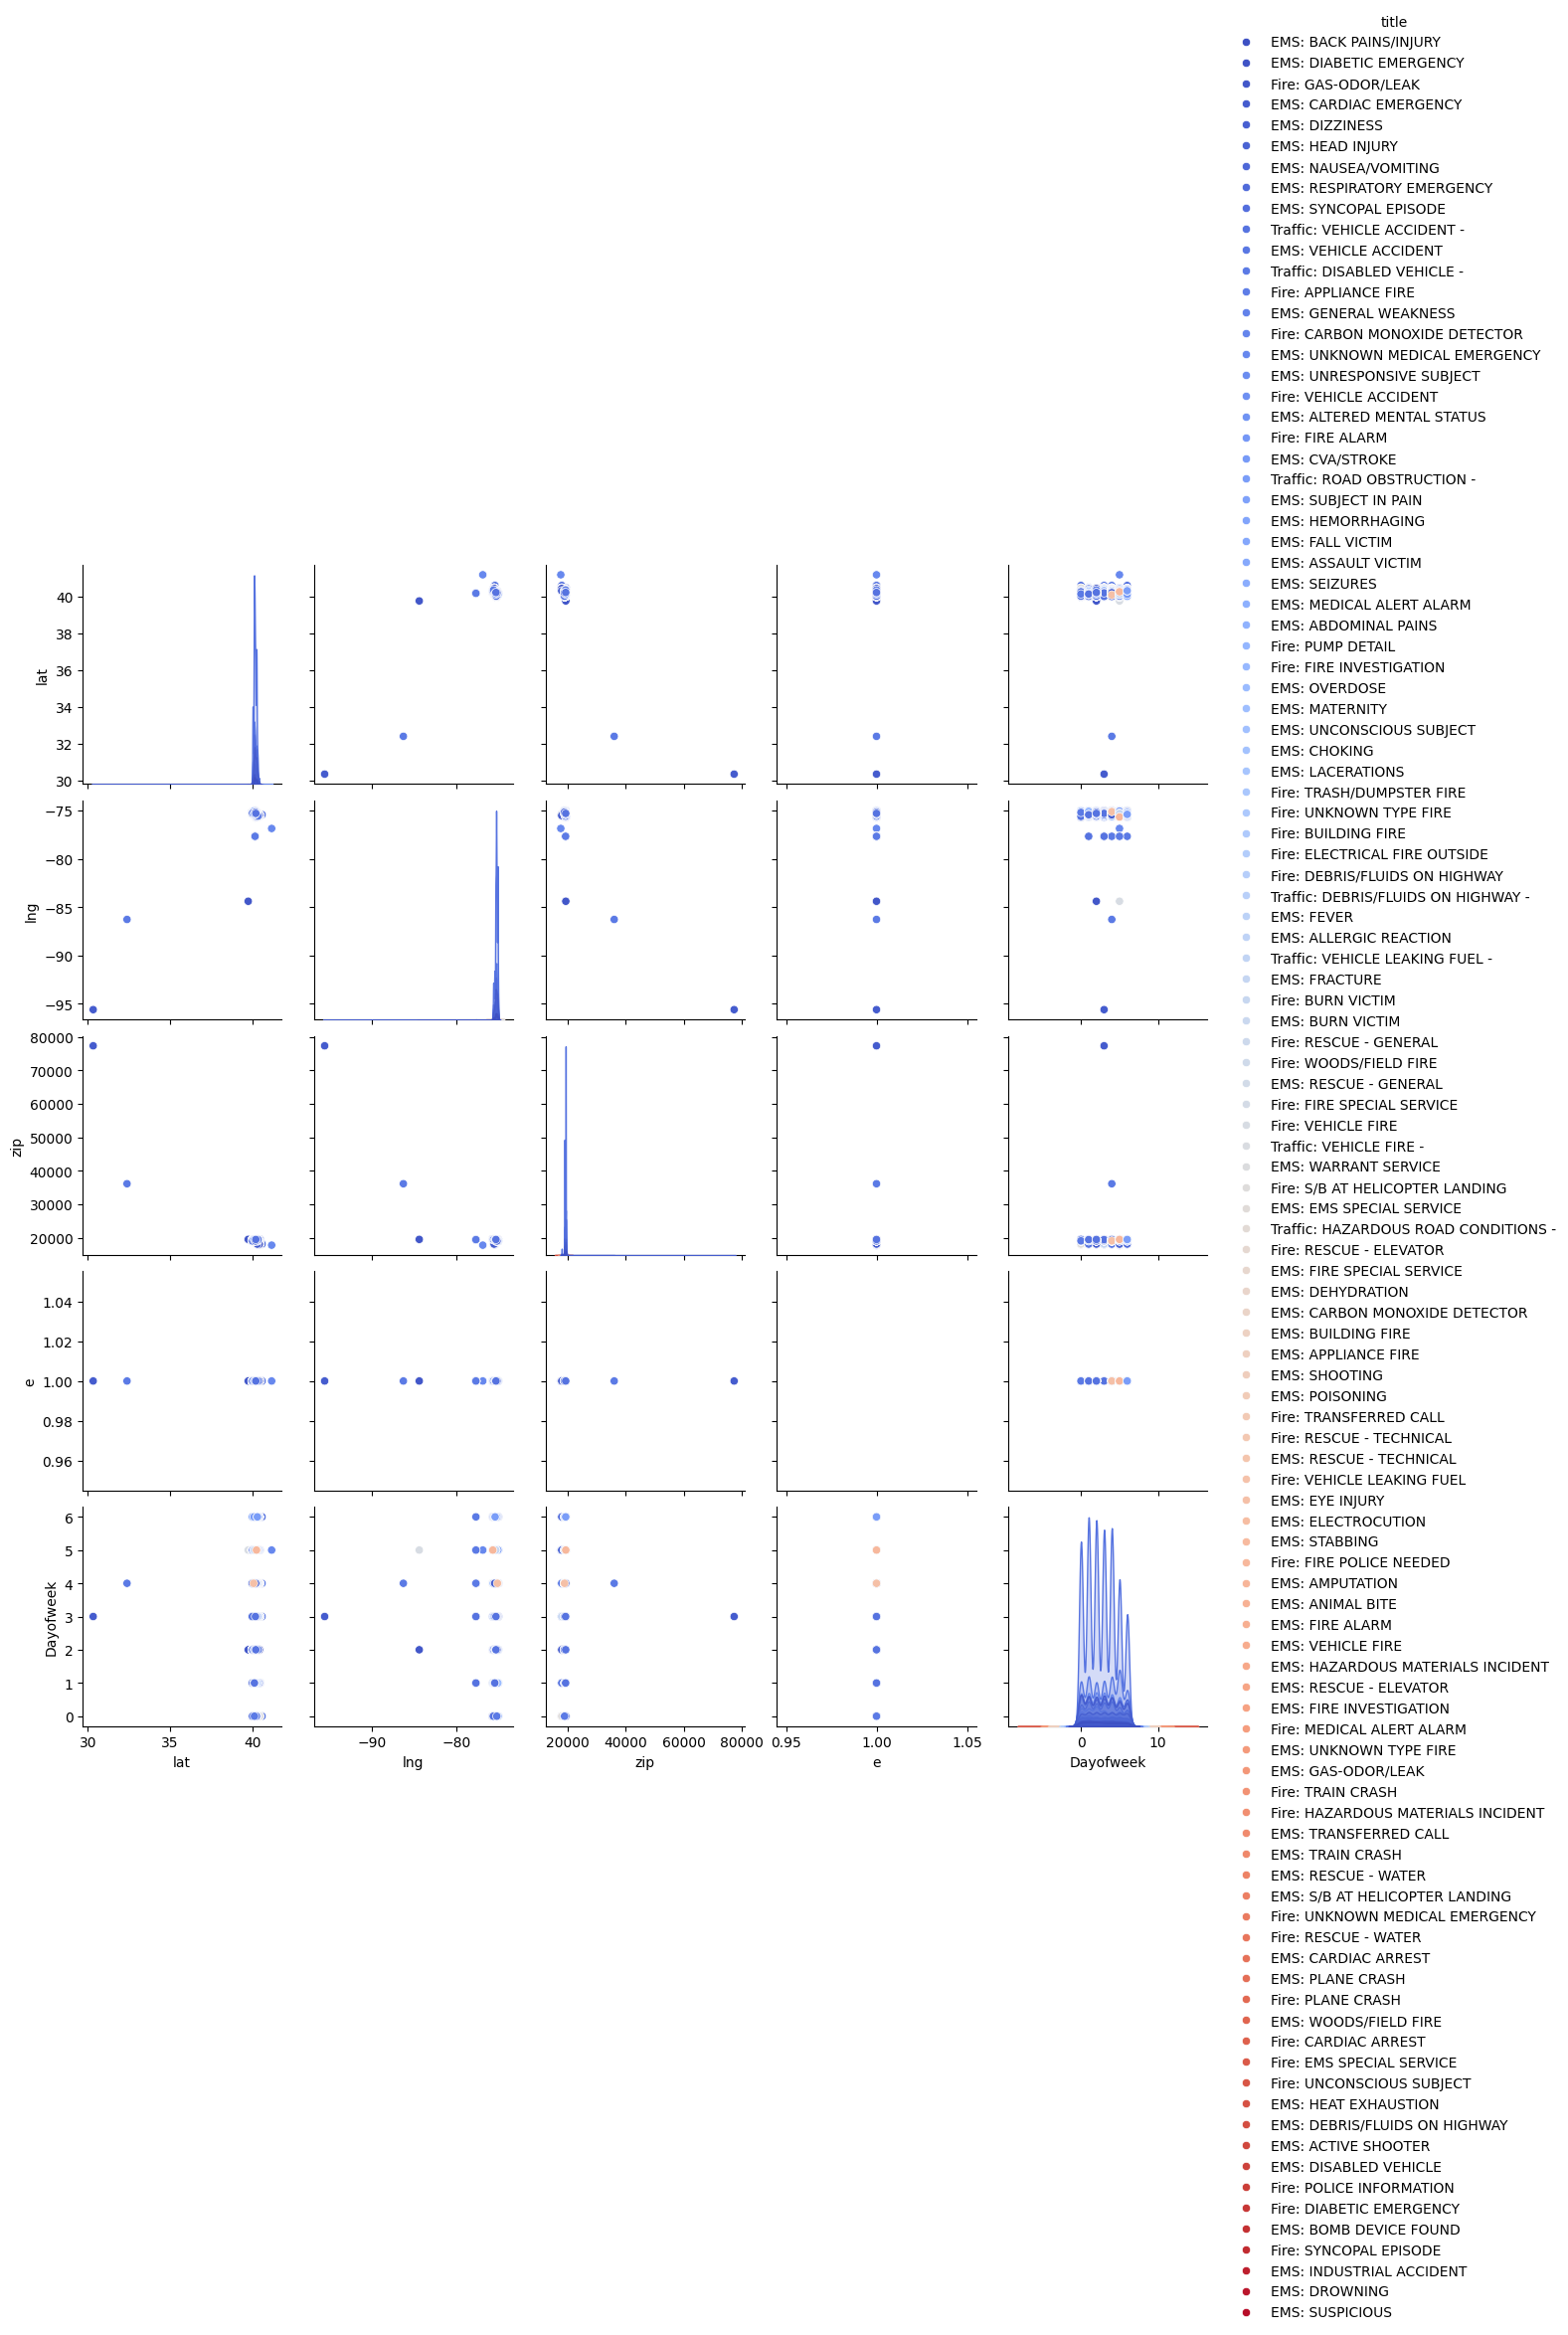

In [91]:
sns.pairplot(df,hue='title',palette='coolwarm')

In [102]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [103]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

<Axes: xlabel='Month', ylabel='count'>

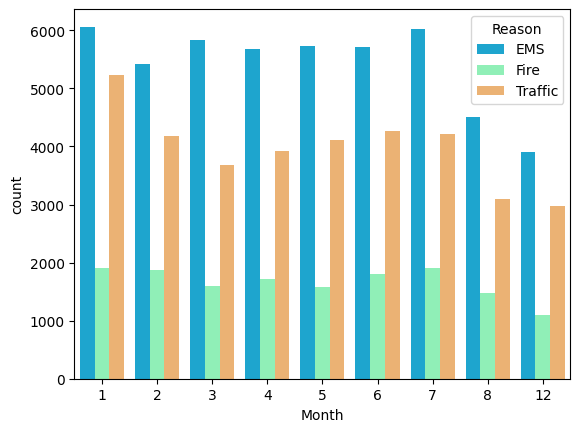

In [109]:
sns.countplot(x='Month',data=df,hue='Reason',palette='rainbow')

<Axes: xlabel='Dayofweek', ylabel='count'>

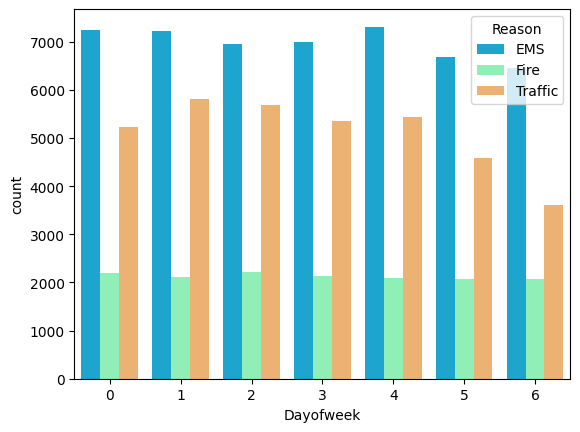

In [110]:
sns.countplot(x='Dayofweek',data=df,hue='Reason',palette='rainbow')

<Axes: xlabel='Hour', ylabel='count'>

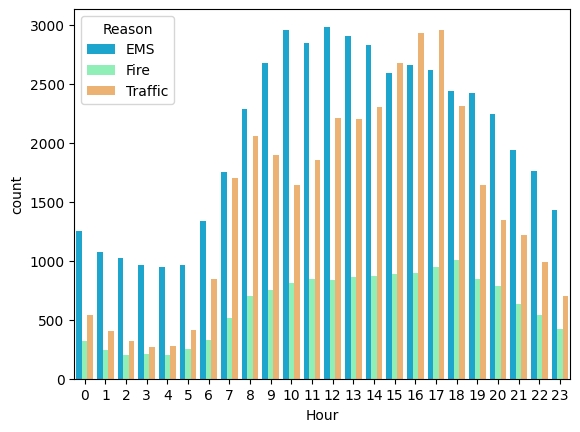

In [111]:
sns.countplot(x='Hour',data=df,hue='Reason',palette='rainbow')

In [112]:
data_grouping = df.groupby('addr').count()
data_grouping

,lat,lng,desc,zip,title,timeStamp,twp,e,Reason,kind,Day,Hour,Dayofweek,Month
addr,,,,,,,,,,,,,,
0,519,519,519,519,519,519,519,519,519,519,519,519,519,519
.,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10TH AVE,6,6,6,6,6,6,6,6,6,6,6,6,6,6
10TH AVE & CHESTNUT ST,3,3,3,3,3,3,3,3,3,3,3,3,3,3
10TH AVE & FORREST ST,5,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIEGLERVILLE RD & N GRAVEL PIKE,3,3,3,3,3,3,3,3,3,3,3,3,3,3
ZOLLINGER WAY & HEATH RD,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ZORRO CT & MILL RD,1,1,1,1,1,1,1,1,1,1,1,1,1,1


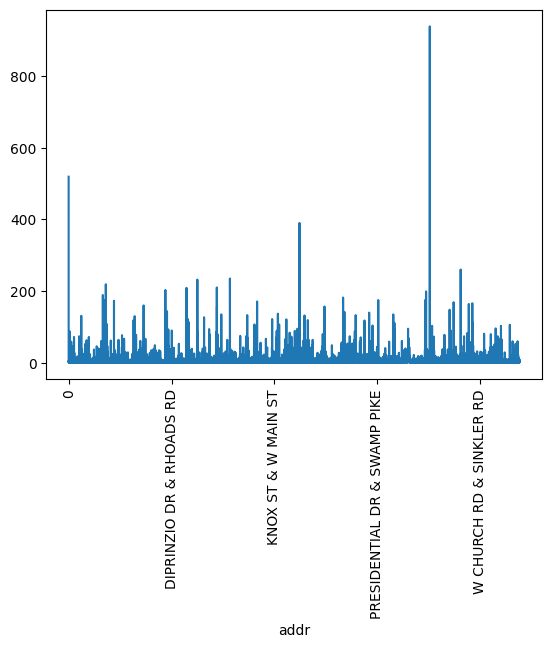

In [125]:
data_grouping['Month'].plot()
plt.xticks(rotation=90)
plt.show()

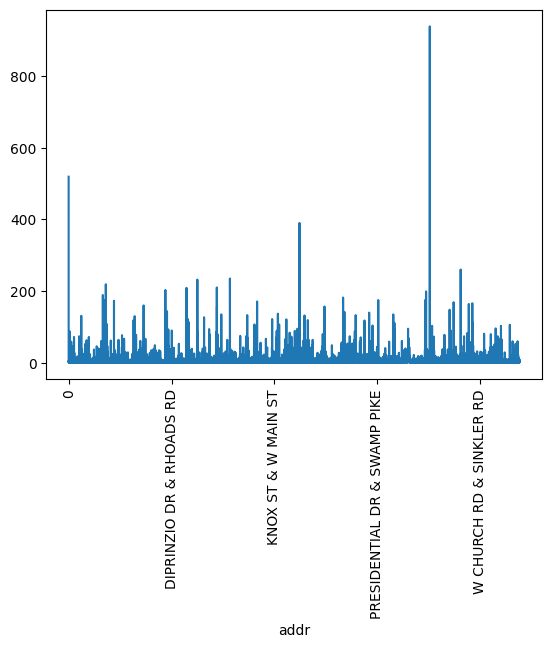

In [127]:
data_grouping['desc'].plot()
plt.xticks(rotation=90)
plt.show()


In [129]:
df.to_csv('/content/gold_911.csv',index=False)